
# What's The Next Song? 




## **INTRODUCTION**

Hello everyone! This Machine Learning (ML) project is part of DAC's project series. It features a Spotify song recommender system, trained using data obtained from our very own Spotify collaborative playlist. It consists of a number of our favorite songs!


**MOTIVATION**


Our group realised that out of all our individual interests,  listening to music is something we all enjoy! This was what inspired us to work on this project together. 

 **QUICK SUMMARY** 

Worked on our dataset using Random Forest and XGboost algorithms, examining the precision of these algorithms in recommending songs for a particular playlist, to each Spotify user. 


Importing Packages

In [ ]:
# Load Python libraries
from sklearn import metrics, ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

Import Dataset

In [ ]:
# first 5 songs in our dataset
df = pd.read_csv('group 5 spotify.csv')


Data Analysis

In [ ]:
df.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,75,4,38,59,0.161,0.293,7,-15.691,0,0.0415,0.569000,0.6610,0.0572,78.331,561640,4
1,47,57,55,0,0.559,0.422,11,-11.890,1,0.1950,0.000002,0.0853,0.1910,74.002,286928,4
2,25,0,31,2,0.526,0.328,1,-9.864,1,0.0461,0.000000,0.1120,0.1100,116.068,526387,4
3,17,7,65,4,0.318,0.219,7,-17.426,0,0.0406,0.913000,0.7760,0.2930,134.380,500973,4
4,54,73,49,3,0.709,0.220,7,-11.856,1,0.0327,0.000000,0.1750,0.5300,110.076,219040,4


In [ ]:
#last 5 songs in our dataset
df.tail()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
95,JJ Lin,JJ林俊傑100天,第幾個100天,2tXTEROacuvyybcZoX9RmT,0.247,0.475,0,-6.658,1,0.0286,0.00000,0.1300,0.201,96.429,278895,3
96,Cass Elliot,Dream A Little Dream Of Me,Dream A Little Dream Of Me,3cOWCcBKwiwUs5PCYirwMI,0.410,0.532,11,-10.394,0,0.1950,0.00000,0.6980,0.406,134.128,221373,4
97,Baek Ji Young,I still love you a lot,I still love you a lot,2zCORPZHF7g9SPjZfrGVuy,0.548,0.404,4,-5.618,1,0.0314,0.00000,0.0791,0.486,129.795,227867,4
98,TOTO,Toto IV,Africa,2374M0fQpWi3dLnB54qaLX,0.671,0.373,9,-18.064,1,0.0323,0.00008,0.0481,0.732,92.718,295893,4
99,Avril Lavigne,Goodbye Lullaby (Deluxe Edition),Wish You Were Here,72po8JKu6e1hLtQ7kGJPg3,0.460,0.866,1,-3.864,0,0.0559,0.00000,0.1900,0.345,165.956,225680,4


Data Preparation

In [ ]:
df.columns

Index(['artist', 'album', 'track_name', 'track_id', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

In [ ]:
# columns in our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            100 non-null    object 
 1   album             100 non-null    object 
 2   track_name        100 non-null    object 
 3   track_id          100 non-null    object 
 4   danceability      100 non-null    float64
 5   energy            100 non-null    float64
 6   key               100 non-null    int64  
 7   loudness          100 non-null    float64
 8   mode              100 non-null    int64  
 9   speechiness       100 non-null    float64
 10  instrumentalness  100 non-null    float64
 11  liveness          100 non-null    float64
 12  valence           100 non-null    float64
 13  tempo             100 non-null    float64
 14  duration_ms       100 non-null    int64  
 15  time_signature    100 non-null    int64  
dtypes: float64(8), int64(4), object(4)
memory usa

In [ ]:
# describing the columns in our dataset
df.describe()

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.551960,0.523324,5.430000,-7.867940,0.830000,0.057327,0.045659,0.200942,0.373591,119.756020,260022.800000,3.940000
std,0.151527,0.199619,3.593639,3.473365,0.377525,0.048058,0.171749,0.180012,0.211411,29.301727,88006.034145,0.238683
min,0.161000,0.092400,0.000000,-18.064000,0.000000,0.024300,0.000000,0.033300,0.057200,71.994000,160347.000000,3.000000
25%,0.467500,0.381250,2.000000,-9.537750,1.000000,0.032375,0.000000,0.096600,0.190000,94.411750,208673.750000,4.000000
50%,0.553500,0.485000,5.500000,-7.150500,1.000000,0.041850,0.000002,0.116000,0.334000,119.930000,235966.500000,4.000000
75%,0.667000,0.655000,8.000000,-5.660750,1.000000,0.059725,0.000133,0.237750,0.493500,138.633750,283189.750000,4.000000
max,0.897000,0.941000,11.000000,-0.323000,1.000000,0.360000,0.913000,0.795000,0.884000,192.099000,663333.000000,4.000000


In [ ]:
# Count Na in %
df.isnull().sum()/df.isnull().count()*100

artist              0.0
album               0.0
track_name          0.0
track_id            0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
duration_ms         0.0
time_signature      0.0
dtype: float64

In [ ]:
# Replace NA
for i in df.select_dtypes(include=['object']).columns:
    df[i][df[i].isnull()] = 'unknown'
df = df.fillna(value=0)

In [ ]:
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
   df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
    df[col] = df[col].cat.codes

Data Visualization

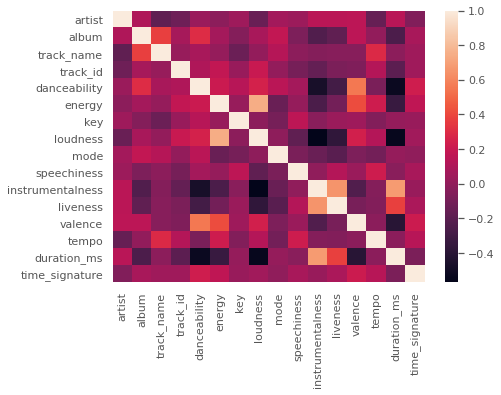

In [ ]:
# Сorrelation matrix
plt.figure(figsize=[7,5])
sns.heatmap(df.corr())
plt.show()

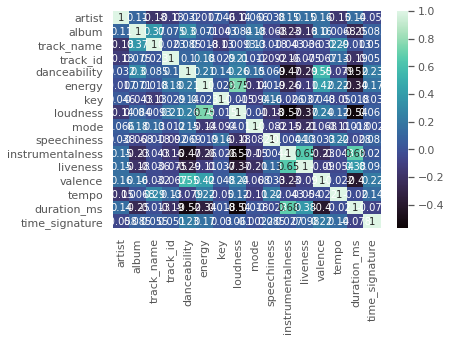

In [ ]:
#
sns.heatmap(df.corr(), cmap='mako', annot=True)

In [ ]:
# Object data to category
for col in df.select_dtypes(include=['object']).columns:
   df[col] = df[col].astype('category')
    
# Encoding categorical features
for col in df.select_dtypes(include=['category']).columns:
   df[col] = df[col].cat.codes

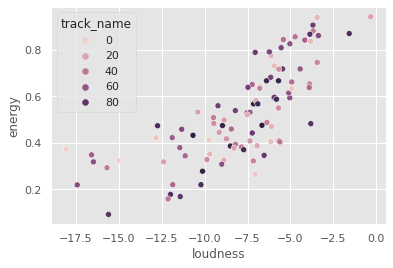

In [ ]:
sns.scatterplot(data=df, x='loudness', y='energy', hue='track_name')

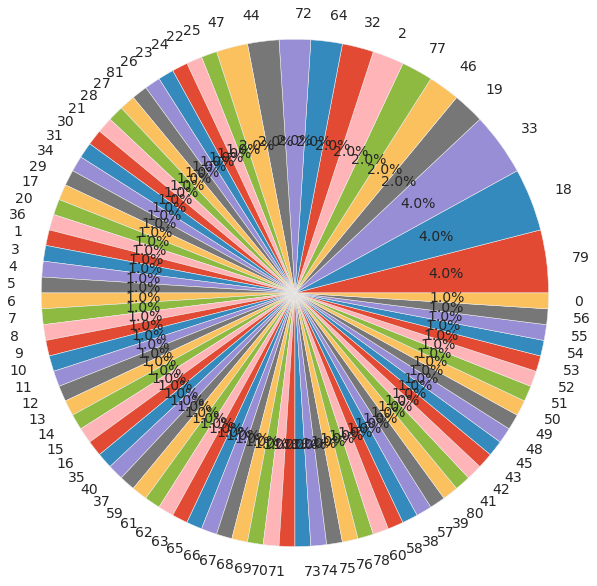

In [ ]:
# Find percent of each artist
df_artist = df['artist'].value_counts() / len(df)
sizes = df_artist.values.tolist()
labels = df_artist.index.values.tolist()

# Pie chart for artist
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False, textprops={'fontsize': 14})
ax1.axis('equal')
plt.show()

Text(0.5, 1.0, 'Artist Name vs Count of songs')

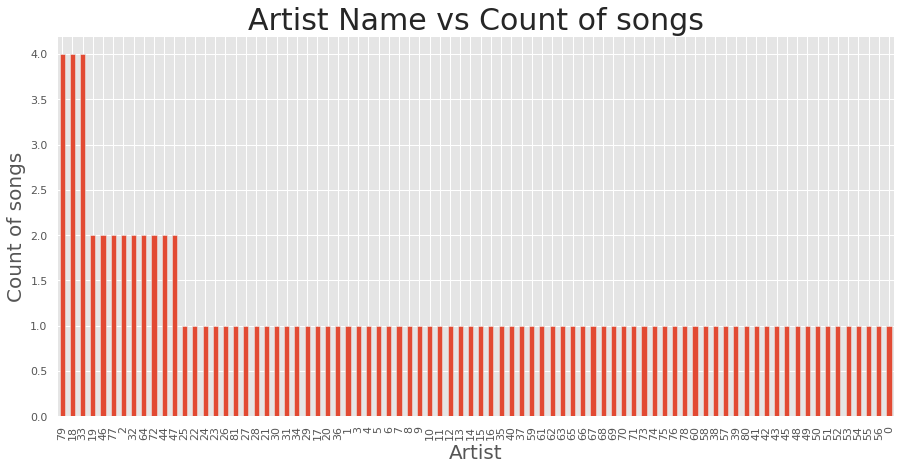

In [ ]:
fig = plt.figure(figsize = (15,7))
df.groupby('artist')['track_name'].agg(len).sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Artist', fontsize = 20)
plt.ylabel('Count of songs', fontsize = 20)
plt.title('Artist Name vs Count of songs', fontsize = 30)

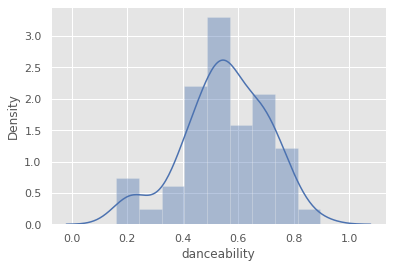

In [ ]:
sns.distplot(df["danceability"], color='b')

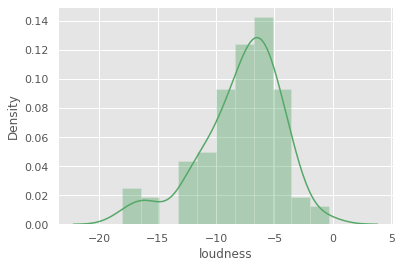

In [ ]:
sns.distplot(df["loudness"], color='g')

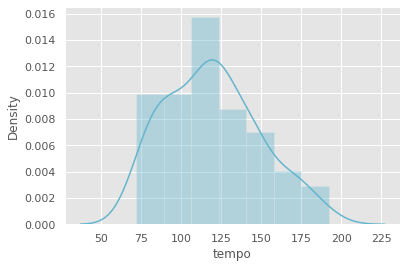

In [ ]:
sns.distplot(df["tempo"], color='c')

Text(0.5, 0, 'artist')

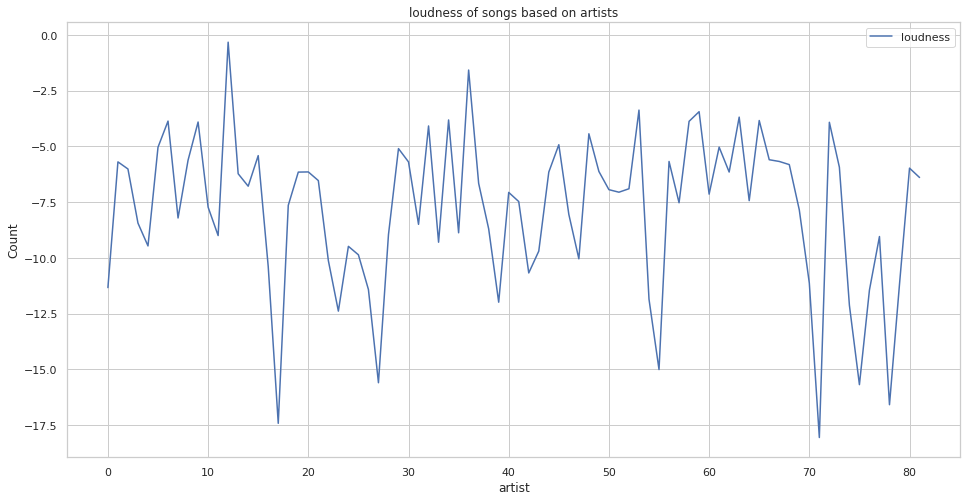

In [ ]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
columns = ["loudness"]
for col in columns:
    x = df.groupby("artist")[col].mean()
    ax= sns.lineplot(x=x.index,y=x,label=col)
ax.set_title('loudness of songs based on artists')
ax.set_ylabel('Count')
ax.set_xlabel('artist')

Random Forest

We selected one of the columns using the Random Forest Model.

In [ ]:
# Model with the best estimator
model = ensemble.RandomForestClassifier(n_estimators=250, max_depth=25)
model.fit(df[df.columns[df.columns != 'danceability']], df.track_name)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
df_plot = pd.DataFrame({'features': df.columns[df.columns != 'track_name'],
                        'importances': model.feature_importances_})
df_plot = df_plot.sort_values('importances', ascending=False)

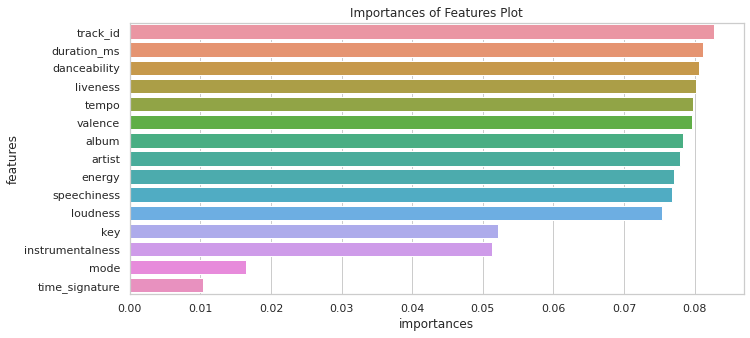

In [ ]:
plt.figure(figsize=[11,5])
sns.barplot(x = df_plot.importances, y = df_plot.features)
plt.title('Importances of Features Plot')
plt.show()

In [ ]:
model.feature_importances_

array([0.07791466, 0.07829317, 0.08277562, 0.08054342, 0.07713443,
       0.05210061, 0.0754243 , 0.01652408, 0.07685548, 0.05132052,
       0.08021556, 0.07957873, 0.07970564, 0.08117754, 0.01043623])

In [ ]:
# Drop columns with importances < 0.06
#df = df.drop(df_plot.features[df_plot.importances < 0.06].tolist(), 1)

In [ ]:
# Selected columns
df.columns

Index(['artist', 'album', 'track_name', 'track_id', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')

XGboost

In [ ]:
import xgboost as xgb

In [ ]:
# Train & Test split
target = df.pop('artist')
train_data, test_data, train_labels, test_labels = train_test_split(df, target, test_size = 0.2, random_state=42)

# Delete df
del df

In [ ]:
# Create model
model = xgb.XGBClassifier(learning_rate=0.2, max_depth=10, min_child_weight=10, n_estimators=250)
model.fit(train_data, train_labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=10, missing=None, n_estimators=250, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Predicting
predict_labels = model.predict(test_data)

In [ ]:
print(metrics.classification_report(test_labels, predict_labels))

              precision    recall  f1-score   support

           7       0.00      0.00      0.00       1.0
          18       0.00      0.00      0.00       0.0
          21       0.00      0.00      0.00       1.0
          28       0.00      0.00      0.00       1.0
          33       0.00      0.00      0.00       2.0
          46       0.00      0.00      0.00       1.0
          48       0.00      0.00      0.00       1.0
          51       0.00      0.00      0.00       1.0
          53       0.00      0.00      0.00       1.0
          54       0.00      0.00      0.00       1.0
          60       0.00      0.00      0.00       1.0
          63       0.00      0.00      0.00       1.0
          64       0.00      0.00      0.00       1.0
          65       0.00      0.00      0.00       1.0
          72       0.00      0.00      0.00       1.0
          73       0.00      0.00      0.00       1.0
          75       0.00      0.00      0.00       1.0
          77       0.00    